In [153]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [154]:
data = pandas.read_csv("train.csv", na_values="NaN")

In [155]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [156]:
real_features = ["Age", "Fare"]
discrete_features = ["SibSp", "Parch", "Pclass"]
cat_features = ["Sex", "Embarked"]
target = "Survived"

In [157]:
data[real_features].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,NaN,7.910400
50%,NaN,14.454200
75%,NaN,31.000000
max,80.000000,512.329200


In [158]:
data[discrete_features].describe()

,SibSp,Parch,Pclass
count,891.000000,891.000000,891.000000
mean,0.523008,0.381594,2.308642
std,1.102743,0.806057,0.836071
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,3.000000
75%,1.000000,0.000000,3.000000
max,8.000000,6.000000,3.000000


In [159]:
# Процент с nan 
for feature_name in real_features:
    coef = (pandas.isnull(data[feature_name]).sum() * 1. ) / pandas.notnull(data[feature_name]).sum()
    if (coef < 1):
        print feature_name, coef

Age 0.247899159664
Fare 0.0


Т.е. пропущен возвраст.
Его можно заменить например средним
data['Age'].fillna(data['Age'].mean())

или удалить эту запись
data.dropna(subset=['Age'], how='all')

In [163]:
data[discrete_features].columns[pandas.notnull(data[discrete_features]).all()].tolist()
#Т.е. пропусков нет

['SibSp', 'Parch', 'Pclass']

In [164]:
# Процент с nan 
for feature_name in cat_features:
    coef = (pandas.isnull(data[feature_name]).sum() * 1. ) / pandas.notnull(data[feature_name]).sum()
    if (coef < 1):
        print feature_name, coef

Sex 0.0
Embarked 0.00224971878515


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000135E80B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011B05AC8>]], dtype=object)

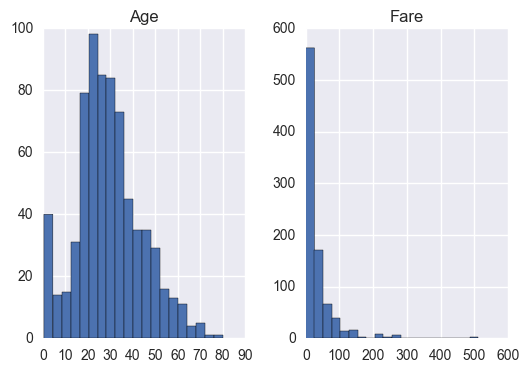

In [165]:
data[real_features].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011E85630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000021B94898>]], dtype=object)

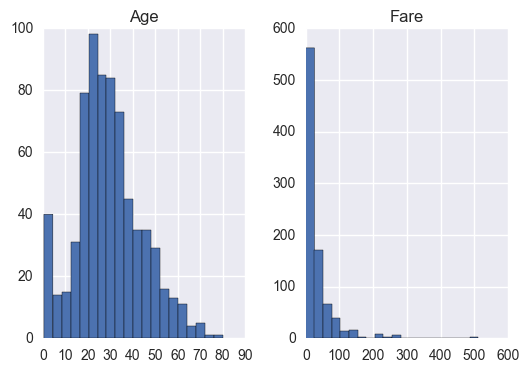

In [166]:
data[real_features].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000221216A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002249DDA0>]], dtype=object)

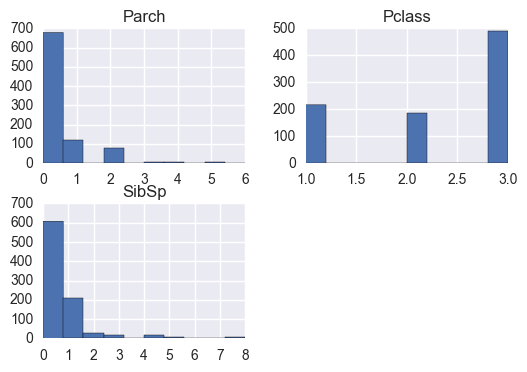

In [167]:
data[discrete_features].hist()

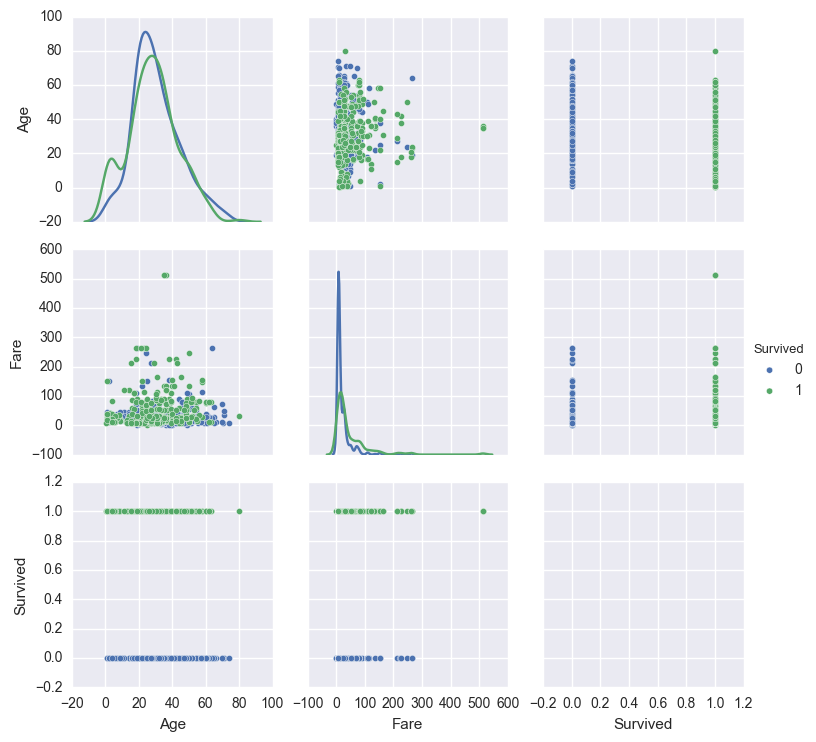

In [168]:
seaborn.pairplot(data[real_features+[target]], hue=target, diag_kind="kde")

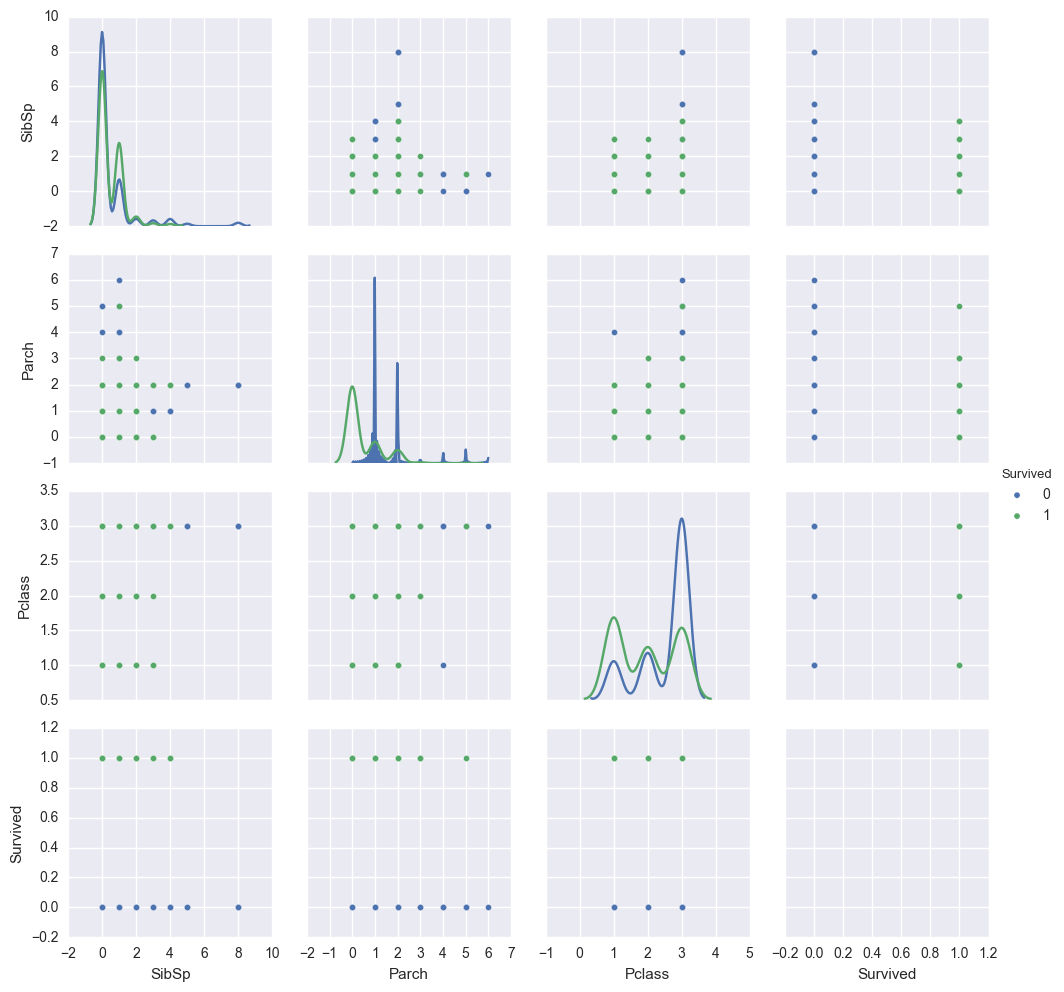

In [169]:
seaborn.pairplot(data[discrete_features+[target]], 
        hue=target, diag_kind="kde")

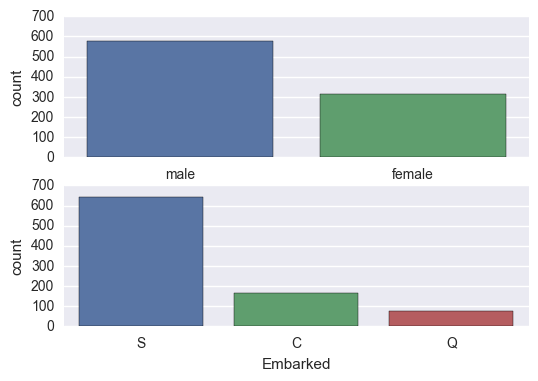

In [170]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharey=True)
for i in range(len(cat_features)):
    seaborn.countplot(x=cat_features[i], data=data, ax=axes[i])

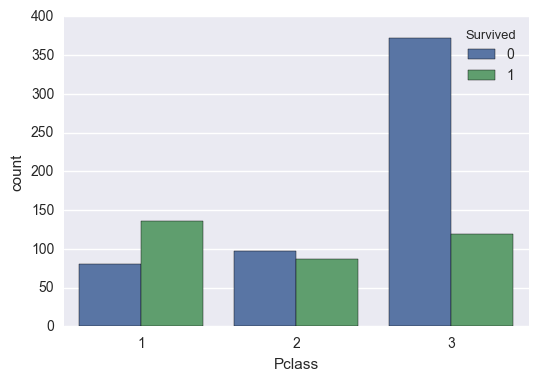

In [171]:
new_cat = ['Pclass']
seaborn.countplot(x=new_cat[0], data=data, hue = target)

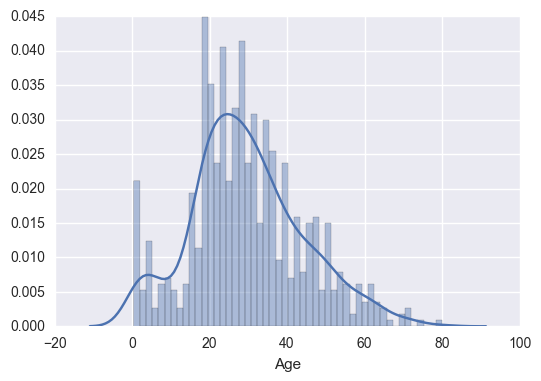

In [172]:
seaborn.distplot(a = data['Age'].dropna(), bins=50)
#Наблюдается выброс

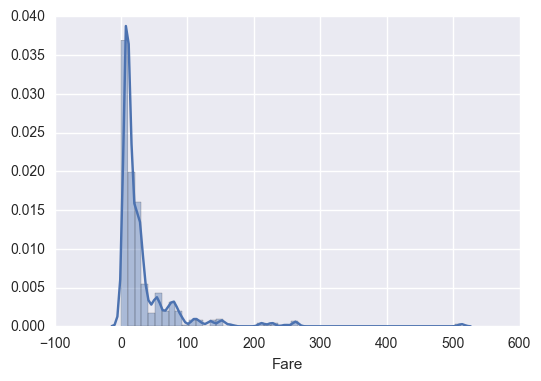

In [173]:
seaborn.distplot(a = data['Fare'].dropna(), bins=50)
#Наблюдается выброс